Question #2 (80 points):
Fit Gaussian and Gamma distributions on the tips dataset and plot the results. Finally, analyze the plots.
Note that this dataset is available in the Omnivox platform under the name of “tips.csv”.

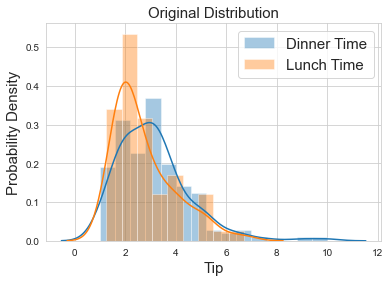

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.linear_model import GammaRegressor
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

%matplotlib inline
color = sns.color_palette()
pd.set_option("display.max_rows", 15000)
pd.set_option("display.max_columns", 100)

df = pd.read_csv("../datasets/tips.csv")

df_dinner = df.tip[df.time == "Dinner"]
df_dinner = df_dinner.sort_values()

df_lunch = df.tip[df.time == "Lunch"]
df_lunch = df_lunch.sort_values()

sns.distplot(df_dinner, label = "Dinner Time")
sns.distplot(df_lunch, label = "Lunch Time")
plt.xlabel("Tip", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
plt.legend(fontsize=15)
plt.title("Original Distribution", fontsize=15)
plt.show()

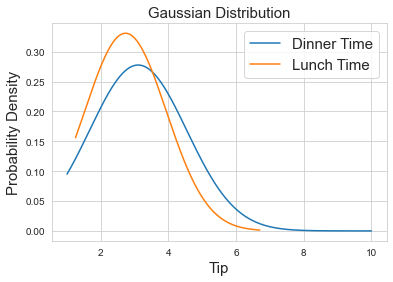

In [3]:
def gaussian(x, n):
    u = x.mean()
    s = x.std()
    
    x = np.linspace(x.min(), x.max(), n)
    a = ((x-u)**2) / (2*(s**2))
    y = 1 / (s*np.sqrt(2*np.pi))*np.exp(-a)
    
    return x, y, x.mean(), x.std()

x1, y1, u1, s1 = gaussian(df_dinner, 200000)
x2, y2, u2, s2 = gaussian(df_lunch, 200000)

plt.plot(x1, y1, label = "Dinner Time")
plt.plot(x2, y2, label = "Lunch Time")
plt.xlabel("Tip", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
plt.legend(fontsize=15)
plt.title("Gaussian Distribution", fontsize=15)
plt.show()

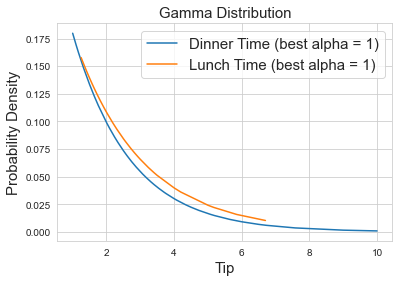

In [4]:
def gamma_function(n):
    cal = 1
    for i in range(2, n):
        cal *= i
    return cal

def gamma(x, a, b):
    c = (b**a) / gamma_function(a)
    y = c * (x ** (a-1)) * np.exp(-b*x)
    return x, y, np.mean(y), np.std(y)

def grid_search(df):
    gamma_gs = GridSearchCV(GammaRegressor(), param_grid={"alpha" : [n for n in range(1, 50)]})

    x = df.values

    x_train, y_train, u1, s1 = gamma(df, 1, 1)

    x_train = np.array([x_train])
    y_train = np.array(y_train)

    x_train = x_train.transpose()

    gamma_gs.fit(x_train, y_train)

    y_gamma = gamma_gs.predict(x_train)
    
    return x_train, y_gamma, gamma_gs

def grid_plot(df_dinner, df_lunch):
    x_train1, y_gamma1, gamma_gs1 = grid_search(df_dinner)
    plt.plot(x_train1, y_gamma1, label = "Dinner Time (best alpha = %d)" % (gamma_gs1.best_estimator_.alpha))
    x_train2, y_gamma2, gamma_gs2 = grid_search(df_lunch)
    plt.plot(x_train2, y_gamma2, label = "Lunch Time (best alpha = %d)" % (gamma_gs2.best_estimator_.alpha))

    plt.xlabel("Tip", fontsize=15)
    plt.ylabel("Probability Density", fontsize=15)
    plt.legend(fontsize=15)
    plt.title("Gamma Distribution", fontsize=15)
    
    return y_gamma1, y_gamma2
    
y_dinner, y_lunch = grid_plot(df_dinner, df_lunch)

In [5]:
print("Dinner: Mean = %f, variance = %f" % (y_dinner.mean(), y_dinner.var()))
print("Lunch: Mean = %f, variance = %f" % (y_lunch.mean(), y_lunch.var()))

Dinner: Mean = 0.067000, variance = 0.001814
Lunch: Mean = 0.086681, variance = 0.001455


The probability density function of dinner tips is represented by the blue line. Its mean is 0.067 and its variance is 0.001814.<br><br>
The probability density function of lunch tips is represented by the orange line. Its mean is 0.086681 and its variance is 0.001455.<br><br>
Comparing the values, we can see that the lunch curve has smaller variance, which can be confirmed visually by its tighter skewness, which indicate higher tips. And the dinner curve, which has greater variance, is larger.<br><br>
Similarly, the mean of the lunch curve is higher, indicating higher tips overall. This can be confirmed visually in the Gamma distribution plot, since the lunch curve is consistently above the dinner curve. That confirms what the Gaussian distribution plot indicates.